In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('space.csv')

In [2]:
df

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-09-01,15:00:00,Titan IIIA,Transtage 1,Retired,63.23,Failure
1,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,16:52:00,Titan IIIA,Transtage 2,Retired,63.23,Success
2,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,15:19:00,Titan IIIA,LES 1,Retired,63.23,Success
3,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,15:00:00,Titan IIIA,LES 2 & LCS 1,Retired,63.23,Success
4,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29,18:43:00,Titan IIIB,KH-8,Retired,59.0,Success
...,...,...,...,...,...,...,...,...,...
1259,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2022-07-15,22:57:00,Long March 2C,SuperView Neo 2-01 & 02,Active,30.8,Success
1260,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2022-07-17,14:20:00,Falcon 9 Block 5,Starlink Group 4-22,Active,67.0,Success
1261,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67.0,Success
1262,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67.0,Success


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        1264 non-null   object
 1   Location       1264 non-null   object
 2   Date           1264 non-null   object
 3   Time           1264 non-null   object
 4   Rocket         1264 non-null   object
 5   Mission        1264 non-null   object
 6   RocketStatus   1264 non-null   object
 7   Price          1264 non-null   object
 8   MissionStatus  1264 non-null   object
dtypes: object(9)
memory usage: 89.0+ KB


In [4]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
df['Year'] = df['Date'].dt.year

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        1264 non-null   object        
 1   Location       1264 non-null   object        
 2   Date           1264 non-null   datetime64[ns]
 3   Time           1264 non-null   object        
 4   Rocket         1264 non-null   object        
 5   Mission        1264 non-null   object        
 6   RocketStatus   1264 non-null   object        
 7   Price          1249 non-null   float64       
 8   MissionStatus  1264 non-null   object        
 9   Year           1264 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 93.9+ KB


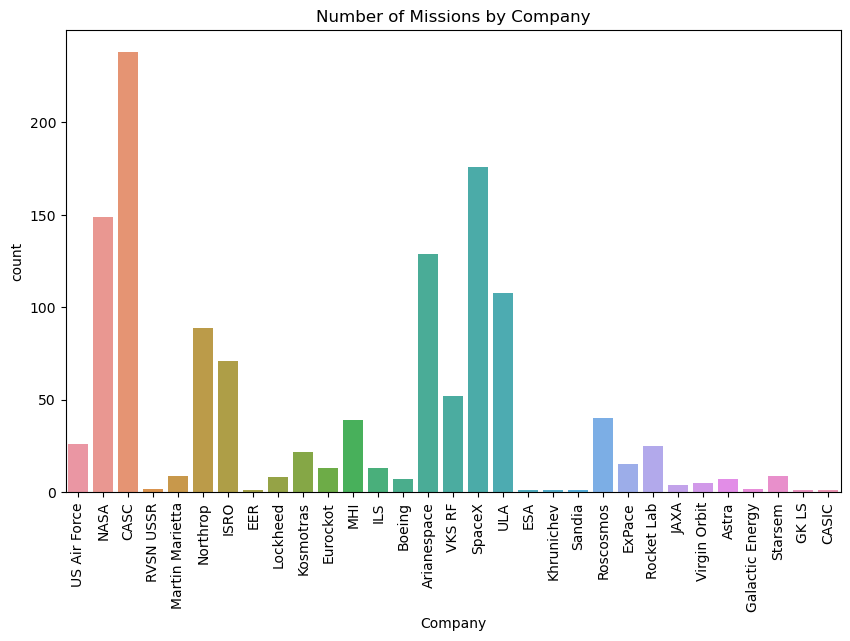

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Company')
plt.title('Number of Missions by Company')
plt.xticks(rotation=90)
plt.show()


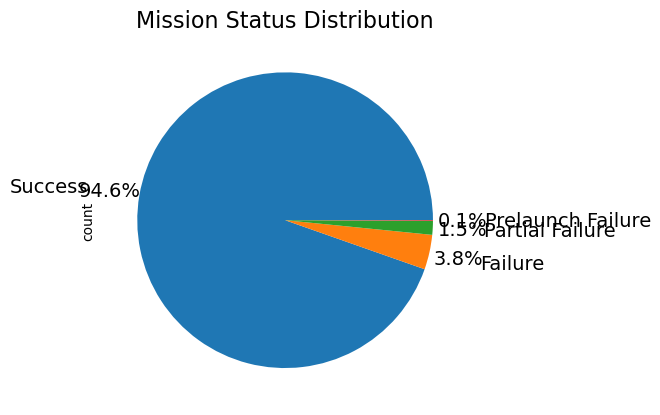

In [23]:
df['MissionStatus'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    textprops={'fontsize': 14},  
    pctdistance=1.2,  
    labeldistance=1.35  )
plt.title('Mission Status Distribution', fontsize=16)
plt.yticks(rotation=90)
plt.show()

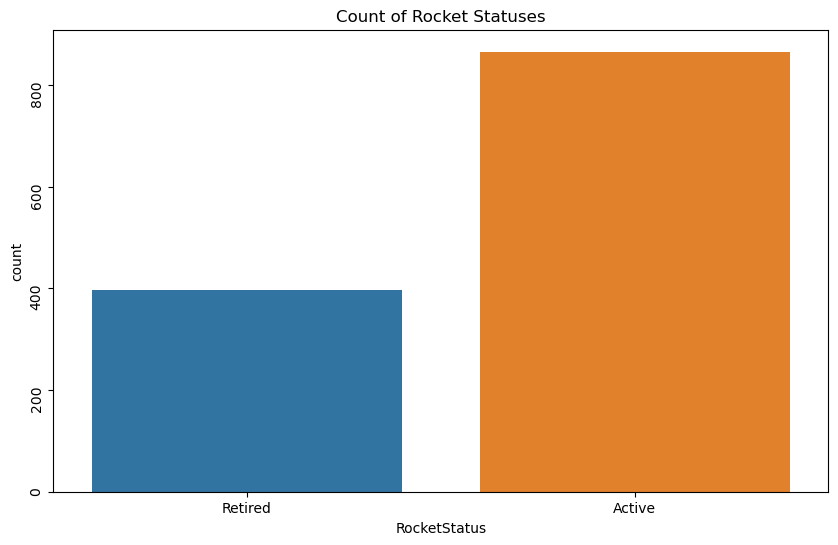

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='RocketStatus')
plt.title('Count of Rocket Statuses')
plt.yticks(rotation=90)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


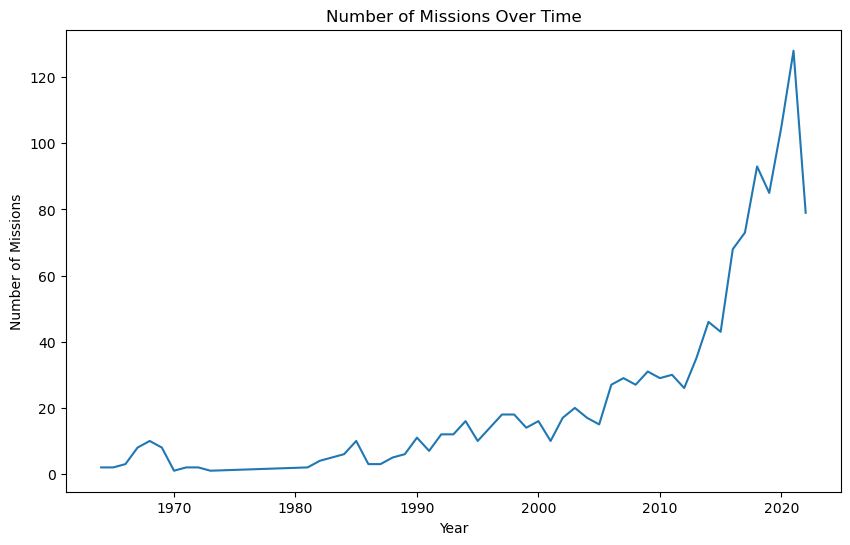

In [31]:
df['Year'] = df['Date'].dt.year
missions_per_year = df.groupby('Year').size()

plt.figure(figsize=(10,6))
sns.lineplot(data=missions_per_year)
plt.title('Number of Missions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.show()
